## Lecture 2. Linear Regression Homework
1. California Housing Price Dataset을 사용하여 Linear Regression을 수행한다.
2. 학습 데이터에 대한 epoch에 따른 MSE 그래프를 그린다.
3. 테스트 데이터에 대한 MSE를 구한다..


In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import numpy as np

np.random.seed(0)

In [24]:
if torch.cuda.is_available() == True:
  DEVICE = 'cuda'
else:
  DEVICE = 'cpu'

print(DEVICE)

cpu



Step 1. Data

In [25]:
train_data=np.loadtxt('sample_data/california_housing_train.csv', dtype='float32', delimiter = ",", skiprows=1)
test_data=np.loadtxt('sample_data/california_housing_test.csv', dtype='float32',delimiter = ",", skiprows=1)

In [26]:
train_x=train_data[:,:8]
train_y=train_data[:,8]
test_x=test_data[:,:8]
test_y=test_data[:,8]


In [27]:
def z_norm(data_x):
  data_x-=np.mean(data_x,axis=0)
  data_x/=np.std(data_x, axis=0)
  return data_x

In [28]:
train_x=z_norm(train_x)
test_x=z_norm(test_x)

In [29]:
train_x = torch.Tensor(train_x)
train_y = torch.Tensor(train_y)
test_x = torch.Tensor(test_x)
test_y = torch.Tensor(test_y)

In [30]:
train_y = torch.unsqueeze(train_y, dim=1)
test_y = torch.unsqueeze(test_y, dim=1)

In [39]:
print(train_x)
print(train_x.size())

tensor([[ 2.6195, -0.6715, -1.0797,  ..., -0.3612, -0.0760, -1.2525],
        [ 2.5397, -0.5733, -0.7619,  ..., -0.2619, -0.0994, -1.0815],
        [ 2.4948, -0.9055, -0.9208,  ..., -0.9554, -0.9993, -1.1701],
        ...,
        [-2.3628,  2.9078, -0.9208,  ..., -0.1617, -0.1176, -0.4467],
        [-2.3628,  2.8891, -0.7619,  ..., -0.1146, -0.0604, -0.9978],
        [-2.3877,  2.2995,  1.8600,  ..., -0.5433, -0.6013, -0.4554]])
torch.Size([17000, 8])


Step 2. Model

In [32]:
class LR(nn.Module):
#nn.Module을 서브클래스로 두면서 NN을 정의하고, __init__에서 NN layers을 초기화한다.
	def __init__(self):
	#init에서는 모델을 초기화하고, 모델 구조 정의가 이루어진다.
		super(LR, self).__init__()
		self.net = nn.Sequential(
				nn.Linear(8,1)
				)
	
	def forward(self, x):
	#forward에서는 실행 정의가 이루어진다. 즉 NN의 결과를 계산한다.
		return self.net(x)

In [33]:
model=LR()

Step 3 and 4. Loss Function and Optimizer

In [34]:
cost_fn = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Training

In [35]:
EPOCHS = 1000
cost_graph=[]

In [36]:
for epoch in range(EPOCHS):
  optimizer.zero_grad() 
  train_yhat=model(train_x)
  cost=cost_fn(train_yhat,train_y)
  cost_graph.append(cost.item())

  cost.backward()
  optimizer.step()

  


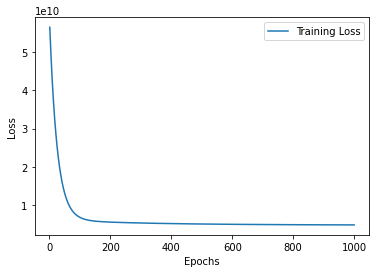

In [37]:
epochs = np.arange(1, EPOCHS+1)
plt.plot(epochs, cost_graph, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Step 5. Testing

In [38]:
with torch.no_grad():
  test_yhat=model(test_x)
  cost=cost_fn(test_yhat, test_y)

print(cost)

tensor(4.9411e+09)
